In [3]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [4]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [5]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')


type(PLAID_SECRET)



str

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [6]:
client = plaid.Client(client_id=PLAID_CLIENT_ID, 
                      secret=PLAID_SECRET, 
                      public_key=PLAID_PUBLIC_KEY, environment='sandbox')
print(client)

### 2. Generate a public token

In [7]:
INSTITUTION_ID = "ins_109508"

In [8]:
# YOUR CODE HERE
#create public token to get access to institution access token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, 
                                                         ['transactions',
                                                          'income',
                                                          'assets'])

### 3. Exchange the public token for an access token

In [9]:
# YOUR CODE HERE
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [10]:
# YOUR CODE HERE
client.Accounts.get(access_token) 

{'accounts': [{'account_id': 'J6kWz8yPKjU59xa55AkdHjPA9BVGg6td4mdGm',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'kPwoaGR1rNs1qAj11o39TGNQlbJPj1sWQkW3X',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'lj7o4lRLzPUlKmZllV34f58lVrxRZDcZwlZ5e',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [11]:
# YOUR CODE HERE
#get transactions for specific date range
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# get transactions for date range
transaction_response = client.Transactions.get(access_token,start_date,end_date)

# Print JSON output
list_of_transactions = json.dumps(transaction_response['transactions'],indent=4, sort_keys=True)
print(list_of_transactions[:600])

[
    {
        "account_id": "J6kWz8yPKjU59xa55AkdHjPA9BVGg6td4mdGm",
        "account_owner": null,
        "amount": 6.33,
        "authorized_date": null,
        "category": [
            "Travel",
            "Taxi"
        ],
        "category_id": "22016000",
        "date": "2020-01-29",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
     


### 2. Print the categories for each transaction

In [12]:
# YOUR CODE HERE
transactions = transaction_response['transactions']
all_categories = []
for transaction in transactions:
    category = transaction['category'][0]
    all_categories.append(category)
    print(category)
    

Travel
Food and Drink
Payment
Food and Drink
Shops
Payment
Travel
Transfer
Transfer
Recreation
Travel
Food and Drink
Food and Drink
Food and Drink
Transfer
Travel
Travel


### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [13]:
# YOUR CODE HERE
transactions = transaction_response['transactions']

dates_all = []
names_all = []
amount_total =[]
categories_all = []

for transaction in transactions:
    category = transaction['category'][0]
    categories_all.append(category)
    dates_all.append(transaction['date'])
    names_all.append(transaction['name'])
    amount_total.append(transaction['amount'])

for i in range(len(dates_all)):
    print(f"{dates_all[i]}, {names_all[i]}, ${amount_total[i]}, Cat: {categories_all[i]}")

df = pd.DataFrame(list(zip(dates_all, names_all, amount_total, categories_all)), 
                 columns=['Date', 'Name', 'Amount', 'Category'])
df.head()

2020-01-29, Uber, $6.33, Cat: Travel
2020-01-26, Tectra Inc, $500, Cat: Food and Drink
2020-01-25, AUTOMATIC PAYMENT - THANK, $2078.5, Cat: Payment
2020-01-25, KFC, $500, Cat: Food and Drink
2020-01-25, Madison Bicycle Shop, $500, Cat: Shops
2020-01-16, CREDIT CARD 3333 PAYMENT *//, $25, Cat: Payment
2020-01-16, Uber, $5.4, Cat: Travel
2020-01-15, ACH Electronic CreditGUSTO PAY 123456, $5850, Cat: Transfer
2020-01-15, CD DEPOSIT .INITIAL., $1000, Cat: Transfer
2020-01-14, Touchstone Climbing, $78.5, Cat: Recreation
2020-01-14, United Airlines, $-500, Cat: Travel
2020-01-13, McDonald's, $12, Cat: Food and Drink
2020-01-13, Starbucks, $4.33, Cat: Food and Drink
2020-01-12, SparkFun, $89.4, Cat: Food and Drink
2020-01-11, INTRST PYMNT, $-4.22, Cat: Transfer
2020-01-01, United Airlines, $500, Cat: Travel
2019-12-30, Uber, $6.33, Cat: Travel


,Date,Name,Amount,Category
0,2020-01-29,Uber,6.33,Travel
1,2020-01-26,Tectra Inc,500.00,Food and Drink
2,2020-01-25,AUTOMATIC PAYMENT - THANK,2078.50,Payment
3,2020-01-25,KFC,500.00,Food and Drink
4,2020-01-25,Madison Bicycle Shop,500.00,Shops


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [14]:
# YOUR CODE HERE
df['Date'].astype('str')
df['Name'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
type(df)
df.head()

,Name,Amount,Category
Date,,,
2020-01-29,2020-01-29,6.33,Travel
2020-01-26,2020-01-26,500.00,Food and Drink
2020-01-25,2020-01-25,2078.50,Payment
2020-01-25,2020-01-25,500.00,Food and Drink
2020-01-25,2020-01-25,500.00,Shops


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [16]:
# YOUR CODE HERE
client.Accounts.get(access_token)
client_response = client.Income.get(access_token)
prev_year_gross_income = client_response['income']['last_year_income_before_tax']
monthly_income_current = client_response['income']['income_streams'][0]['monthly_income']
projected_annual_income = monthly_income_current * 12

print(f"1. Previous Year's Gross Income: ${prev_year_gross_income:,}")
print(f"2. Monthly Income: ${monthly_income_current:,}")
print(f"3. Previous Year Gross Income: ${projected_annual_income:,}")

1. Previous Year's Gross Income: $7,285
2. Monthly Income: $500
3. Previous Year Gross Income: $6,000


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

                Total Expenses Per Category
Category                                   
Transfer                            6845.78
Payment                             2103.50
Food and Drink                      1105.73
Shops                                500.00
Recreation                            78.50
Travel                                18.06


,Category,Amount
Date,,
2020-01-29,Travel,6.33
2020-01-26,Food and Drink,500.00
2020-01-25,Payment,2078.50
2020-01-25,Food and Drink,500.00
2020-01-25,Shops,500.00


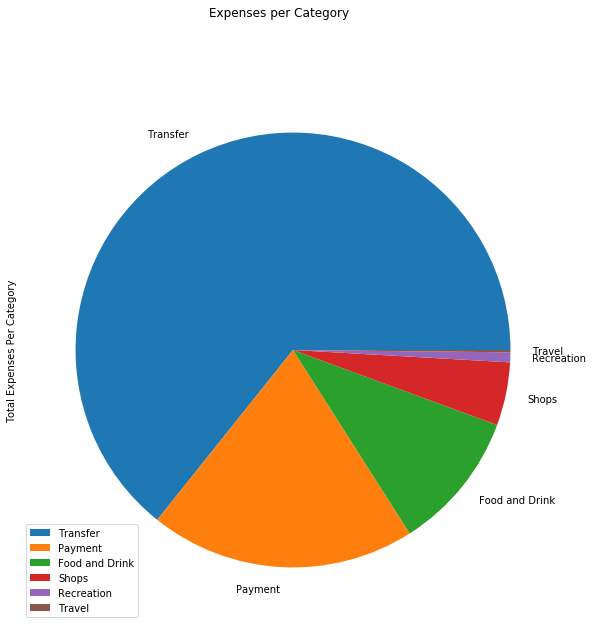

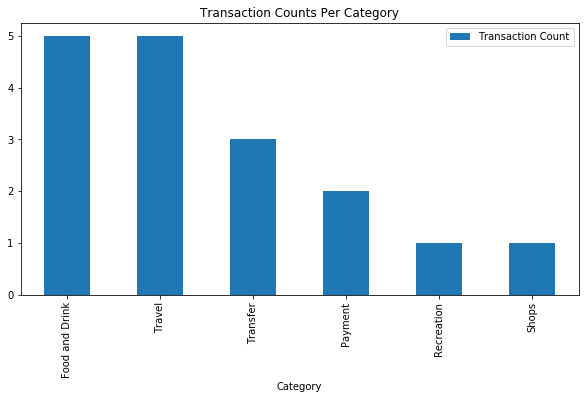

In [17]:
# YOUR CODE HERE
category_sum_df = df.filter(['Category', 'Amount'])
cat_group = category_sum_df.groupby(['Category']).sum()
cat_group.columns = ['Total Expenses Per Category']
cat_group.sort_values('Total Expenses Per Category', ascending=False, inplace=True)
print(cat_group)
cat_group.plot.pie(subplots=True, figsize=(15,10), title="Expenses per Category")
cat_group_count = df.filter(['Category', 'Amount']).groupby(['Category']).count()
cat_group_count.columns = ['Transaction Count']
cat_group_count.sort_values('Transaction Count', ascending=False, inplace=True)
cat_group_count.plot.bar(figsize=(10,5), title="Transaction Counts Per Category")
category_sum_df.head()

### Calculate the expenses per month

In [18]:
# YOUR CODE HERE
expenses_df = df.filter(['Date','Amount'])
expenses_df.index = pd.to_datetime(expenses_df.index)

group_month = expenses_df.groupby(expenses_df.index.month).sum()
group_month.sort_index()
print(f"Total Monthly Expenses", expenses_df.sum())

Total Monthly Expenses Amount    10651.57
dtype: float64
